In [122]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [123]:
# Set the paths to the training and testing image folders
train_folder = "E:\Thesis\dataset\Final Dataset\Training"
test_folder = "E:\Thesis\dataset\Final Dataset\Testing"

In [124]:
# Define image dimensions
image_height = 512
image_width = 512

# Load and preprocess the training dataset
X_train = []
y_train = []


In [125]:
# Load male training images
male_train_folder = os.path.join(train_folder, "male")
male_train_images = os.listdir(male_train_folder)
for image_name in male_train_images:
    image_path = os.path.join(male_train_folder, image_name)
    image = load_img(image_path, target_size=(image_height, image_width))
    image = img_to_array(image)
    X_train.append(image)
    y_train.append(0)  # 0 represents male

In [126]:
# Load female training images
female_train_folder = os.path.join(train_folder, "female")
female_train_images = os.listdir(female_train_folder)
for image_name in female_train_images:
    image_path = os.path.join(female_train_folder, image_name)
    image = load_img(image_path, target_size=(image_height, image_width))
    image = img_to_array(image)
    X_train.append(image)
    y_train.append(1)  # 1 represents female

In [127]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [128]:
# Convert the training lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

In [129]:
# Preprocess the training images
X_train = preprocess_input(X_train)

In [130]:
# Load and preprocess the testing dataset
X_test = []
y_test = []


In [131]:
# Load male testing images
male_test_folder = os.path.join(test_folder, "male")
male_test_images = os.listdir(male_test_folder)
for image_name in male_test_images:
    image_path = os.path.join(male_test_folder, image_name)
    image = load_img(image_path, target_size=(image_height, image_width))
    image = img_to_array(image)
    X_test.append(image)
    y_test.append(0)  # 0 represents male

In [132]:
# Load female testing images
female_test_folder = os.path.join(test_folder, "female")
female_test_images = os.listdir(female_test_folder)
for image_name in female_test_images:
    image_path = os.path.join(female_test_folder, image_name)
    image = load_img(image_path, target_size=(image_height, image_width))
    image = img_to_array(image)
    X_test.append(image)
    y_test.append(1)  # 1 represents female

In [133]:
# Convert the testing lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)


In [134]:
# Preprocess the testing images
X_test = preprocess_input(X_test)

In [135]:
# Convert labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

In [136]:
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(512, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(2, activation='softmax')
])


In [137]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [138]:
# Define early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [139]:
# Train the model with early stopping
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32), epochs=50,
     validation_split=0.2, callbacks=[early_stopping]
)


Epoch 1/50
188/188 [==============================] - 25s 127ms/step - loss: 1.2808 - accuracy: 0.5345 - val_loss: 1.3550 - val_accuracy: 0.5508
Epoch 2/50
188/188 [==============================] - 24s 125ms/step - loss: 0.7084 - accuracy: 0.5985 - val_loss: 0.6312 - val_accuracy: 0.6342
Epoch 3/50
188/188 [==============================] - 24s 125ms/step - loss: 0.6607 - accuracy: 0.6165 - val_loss: 0.6001 - val_accuracy: 0.6733
Epoch 4/50
188/188 [==============================] - 24s 126ms/step - loss: 0.6089 - accuracy: 0.6752 - val_loss: 0.6164 - val_accuracy: 0.6817
Epoch 5/50
188/188 [==============================] - 24s 127ms/step - loss: 0.5594 - accuracy: 0.7228 - val_loss: 0.5162 - val_accuracy: 0.7492
Epoch 6/50
188/188 [==============================] - 24s 127ms/step - loss: 0.5002 - accuracy: 0.7652 - val_loss: 0.3799 - val_accuracy: 0.8258
Epoch 7/50
188/188 [==============================] - 24s 127ms/step - loss: 0.4589 - accuracy: 0.7862 - val_loss: 0.3822 - val_ac

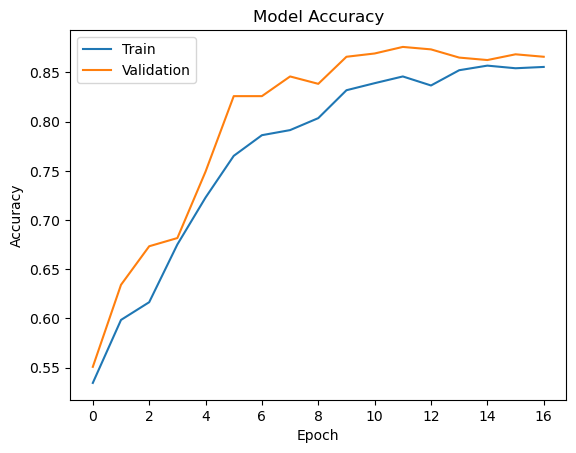

In [143]:
# Plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

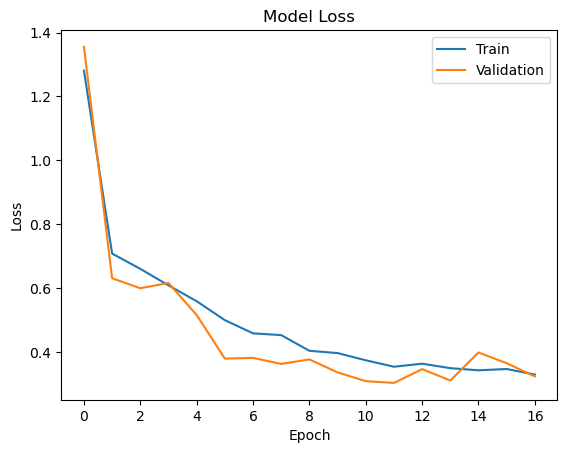

In [144]:
# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [140]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

38/38 [==============================] - 1s 34ms/step - loss: 0.3038 - accuracy: 0.8758
Test Loss: 0.3038269579410553
Test Accuracy: 0.8758333325386047


In [141]:
# Make predictions on test images
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)

38/38 [==============================] - 1s 33ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       600
           1       0.87      0.89      0.88       600

    accuracy                           0.88      1200
   macro avg       0.88      0.88      0.88      1200
weighted avg       0.88      0.88      0.88      1200

Confusion Matrix:
 [[520  80]
 [ 69 531]]


Accuracy Score:  0.8758333333333334
Confusion Matrix: 
 [[520  80]
 [ 69 531]]


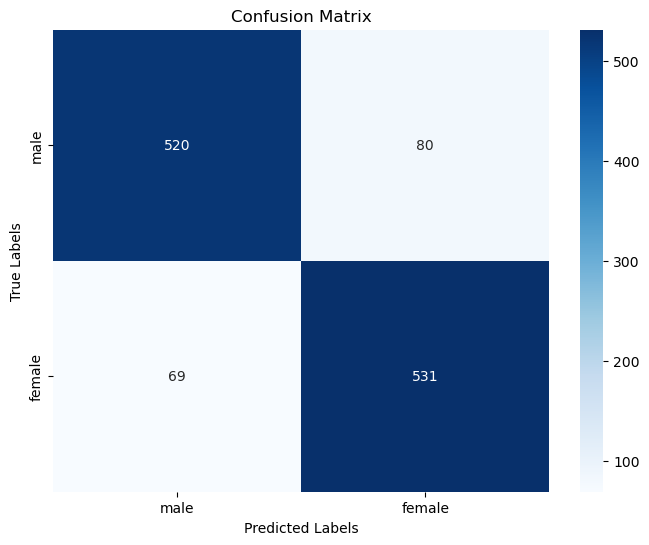

In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
# Calculate accuracy score and confusion matrix
acc_score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Accuracy Score: ', acc_score)
print('Confusion Matrix: \n', cm)

# Plot confusion matrix as a heatmap
labels = ["male", "female"]
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
